<a href="https://colab.research.google.com/github/Nandan0402/Loan-Eligibility-Prediction/blob/main/Loan_Eligibility_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv("loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP000001,Male,No,3+,Graduate,No,14268,1257,465,360,1.0,Urban,N
1,LP000002,Female,No,0,Graduate,No,14532,464,553,360,1.0,Rural,N
2,LP000003,Male,Yes,2,Not Graduate,No,5695,3294,503,360,1.0,Semiurban,Y
3,LP000004,Male,Yes,0,Graduate,No,23062,6774,340,300,1.0,Urban,Y
4,LP000005,Male,No,0,Graduate,No,20439,7431,583,360,0.0,Urban,N


In [19]:
df.shape

(614, 13)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    int64  
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 62.5+ KB


In [21]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
df.Loan_Status.unique()

array(['N', 'Y'], dtype=object)

In [23]:
df.Gender.value_counts(dropna=False)

,count
Gender,
Male,482
Female,132


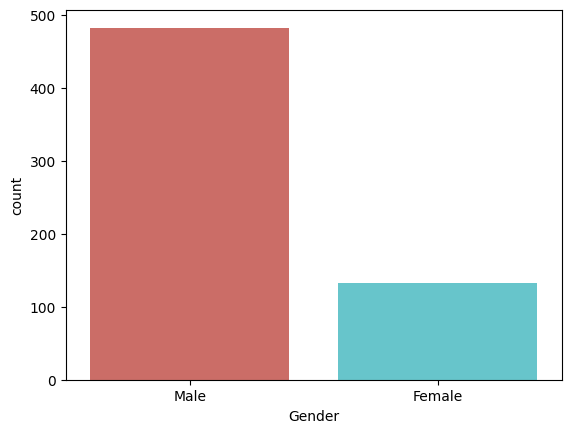

In [24]:
sns.countplot(x="Gender",data=df,palette='hls')
plt.show()

In [25]:
countMale = len(df[df['Gender'] == 'Male'])
countFemale = len(df[df['Gender'] == 'Female'])
countNull = len(df[df['Gender'].isnull()])
totalCount = len(df)
# countMale , countFemale , countNull, totalCount # This line just prints, not assigns

In [26]:
print("Male Percentage:{:.2f}%".format((countMale/totalCount)*100))
print("Female Percentage:{:.2f}%".format((countFemale/totalCount)*100))
print("Missing Percentage:{:.2f}%".format((countNull/totalCount)*100))

Male Percentage:78.50%
Female Percentage:21.50%
Missing Percentage:0.00%


In [27]:
df.Married.value_counts(dropna=False)

,count
Married,
Yes,400
No,214


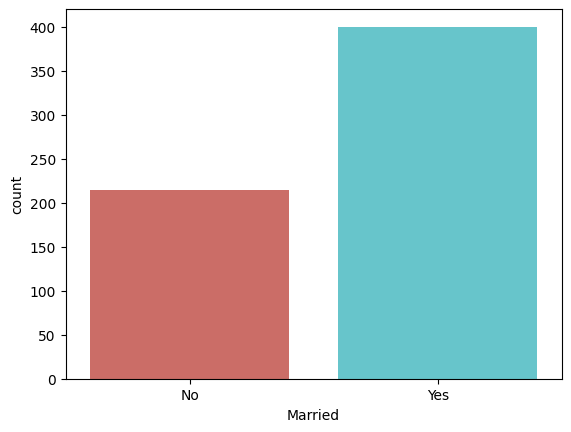

In [28]:
sns.countplot(x="Married",data=df,palette='hls')
plt.show()

In [29]:
countMarried=len(df[df['Married']=='Yes'])
countUnmarried=len(df[df['Married']=='No'])
countNull=len(df[df['Married'].isnull()])

print("Married Percentage:{:.2f}%".format((countMarried/(countMarried+countUnmarried))*100))
print("Unmarried Percentage:{:.2f}%".format((countUnmarried/(countMarried+countUnmarried))*100))
print("Missing Percentage:{:.2f}%".format((countNull/(countMarried+countUnmarried))*100))

Married Percentage:65.15%
Unmarried Percentage:34.85%
Missing Percentage:0.00%


In [30]:
df.Credit_History.value_counts(dropna=False)

,count
Credit_History,
1.0,494
0.0,120


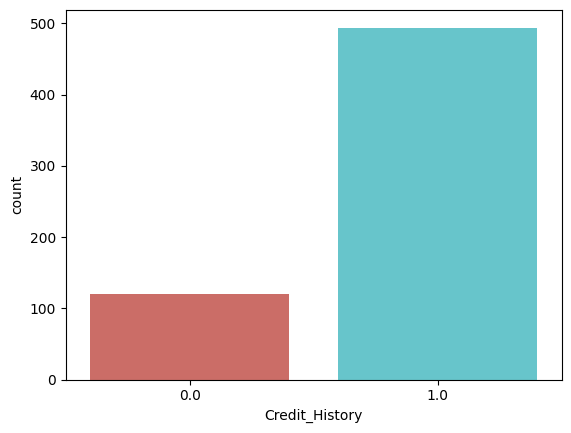

In [31]:
sns.countplot(x="Credit_History",data=df,palette='hls')
plt.show()

In [32]:
df.Loan_Amount_Term.value_counts(dropna=False)

,count
Loan_Amount_Term,
360,458
180,61
240,35
300,31
120,29


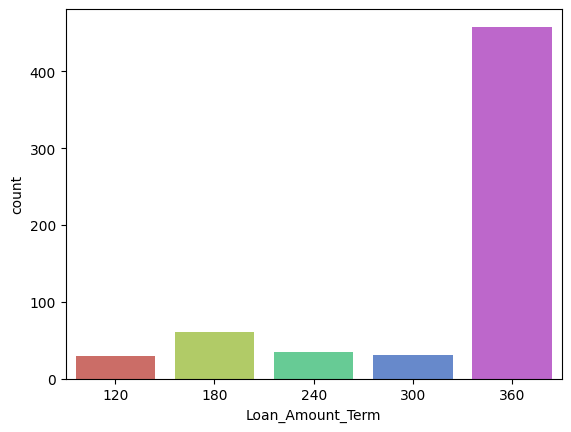

In [33]:
sns.countplot(x="Loan_Amount_Term",data=df,palette='hls')
plt.show()

In [34]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [35]:
df.Property_Area.value_counts(dropna=False)

,count
Property_Area,
Semiurban,233
Urban,225
Rural,156


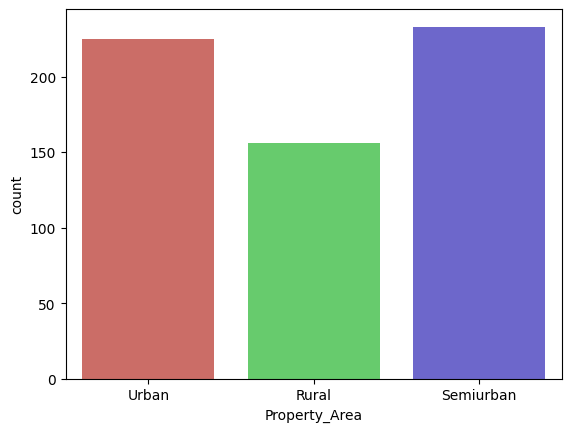

In [36]:
sns.countplot(x="Property_Area",data=df,palette='hls')
plt.show()

In [37]:
df.Loan_Status.value_counts(dropna=False)

,count
Loan_Status,
Y,426
N,188


In [38]:
countYes=len(df[df['Loan_Status']=='Y'])
countNo=len(df[df['Loan_Status']=='N'])

print("Approved Loan Percentage:{:.2f}%".format((countYes/(countYes+countNo))*100))
print("Rejected Loan Percentage:{:.2f}%".format((countNo/(countYes+countNo))*100))

Approved Loan Percentage:69.38%
Rejected Loan Percentage:30.62%


In [39]:
df.select_dtypes(include=np.number).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [40]:
df.select_dtypes(include=np.number).describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,12843.149837,6026.941368,377.724756,320.912052,0.804560
std,6844.969288,3510.240475,183.720213,73.640913,0.396862
min,1553.000000,52.000000,50.000000,120.000000,0.000000
25%,6494.500000,3072.750000,228.250000,300.000000,1.000000
50%,12874.500000,6071.500000,379.000000,360.000000,1.000000
75%,18655.250000,9115.500000,539.000000,360.000000,1.000000
max,24970.000000,11994.000000,699.000000,360.000000,1.000000


<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

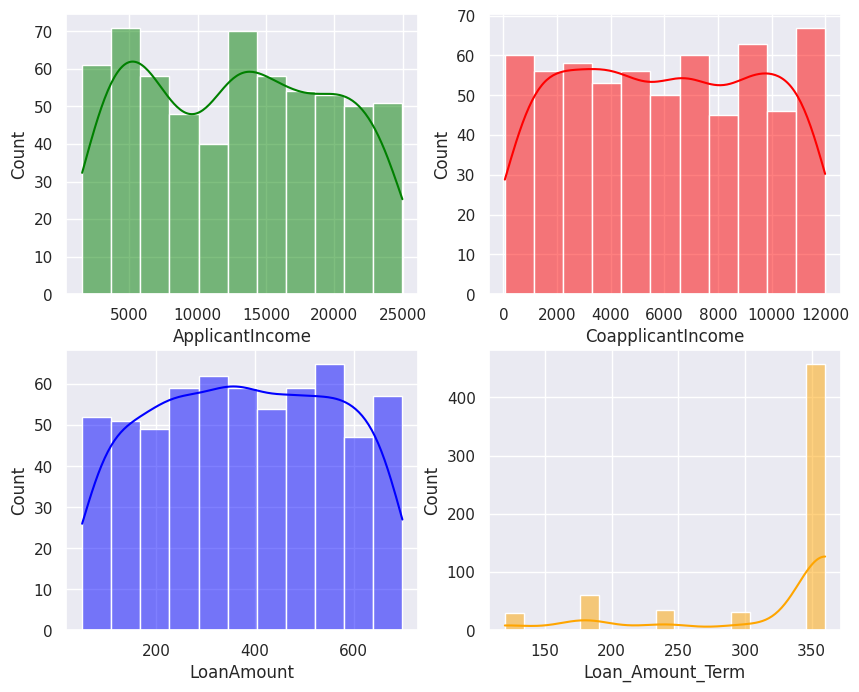

In [41]:
sns.set(style="darkgrid")

fig,axs = plt.subplots(2,2, figsize=(10, 8))

sns.histplot(df['ApplicantIncome'], ax=axs[0,0],kde=True,color='green')
sns.histplot(df['CoapplicantIncome'], ax=axs[0,1],kde=True,color='red')
sns.histplot(df['LoanAmount'], ax=axs[1,0],kde=True,color='blue')
sns.histplot(df['Loan_Amount_Term'], ax=axs[1,1],kde=True,color='orange')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    int64  
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 62.5+ KB


<Axes: >

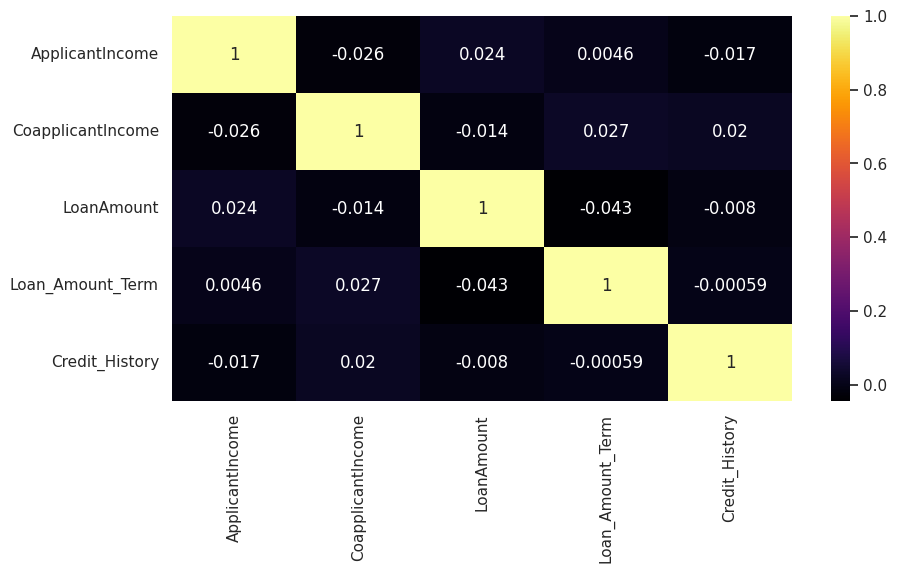

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            cmap='inferno')

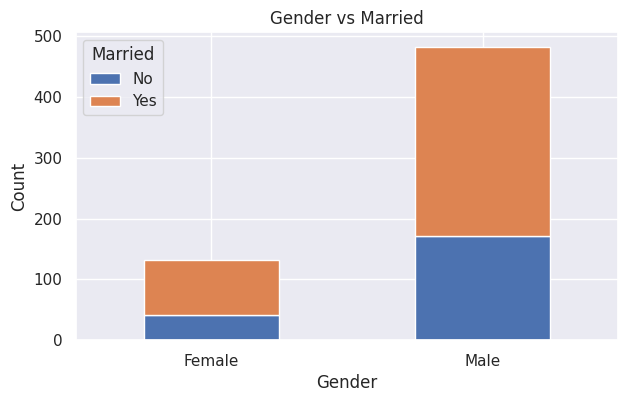

In [44]:
pd.crosstab(df.Gender,df.Married).plot(kind='bar',stacked=True,figsize=(7,4))
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

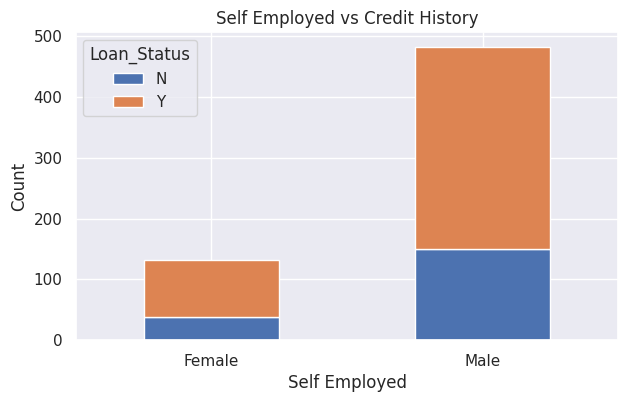

In [45]:
pd.crosstab(df.Gender,df.Loan_Status).plot(kind='bar',stacked=True,figsize=(7,4))
plt.title('Self Employed vs Credit History')
plt.xlabel("Self Employed")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

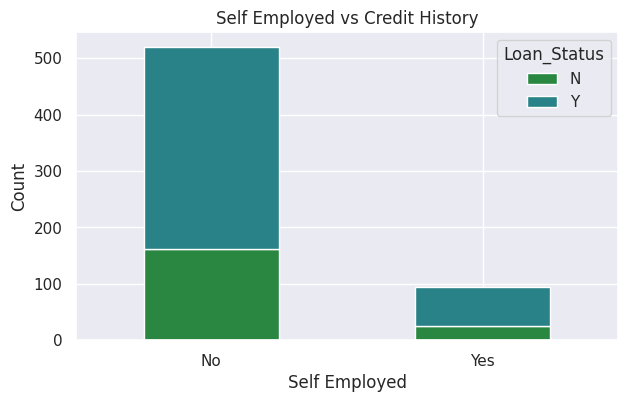

In [46]:
pd.crosstab(df.Self_Employed,df.Loan_Status).plot(kind='bar',stacked=True,figsize=(7,4),color=['#298742','#298287'])
plt.title('Self Employed vs Credit History')
plt.xlabel("Self Employed")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

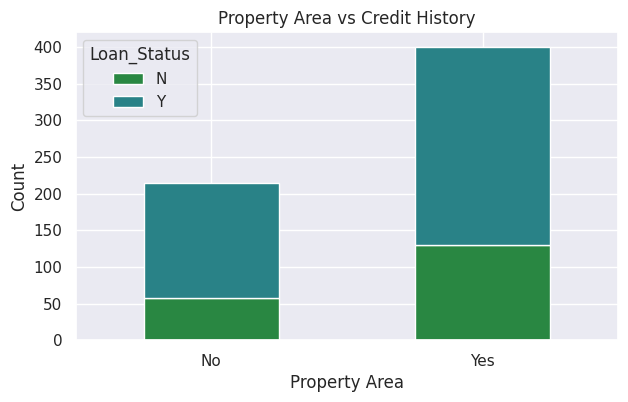

In [47]:
pd.crosstab(df.Married,df.Loan_Status).plot(kind='bar',stacked=True,figsize=(7,4),color=['#298742','#298287'])
plt.title('Property Area vs Credit History')
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [48]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP000001,Male,No,3+,Graduate,No,14268,1257,465,360,1.0,Urban,N
1,LP000002,Female,No,0,Graduate,No,14532,464,553,360,1.0,Rural,N
2,LP000003,Male,Yes,2,Not Graduate,No,5695,3294,503,360,1.0,Semiurban,Y
3,LP000004,Male,Yes,0,Graduate,No,23062,6774,340,300,1.0,Urban,Y
4,LP000005,Male,No,0,Graduate,No,20439,7431,583,360,0.0,Urban,N


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    int64  
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 62.5+ KB


<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

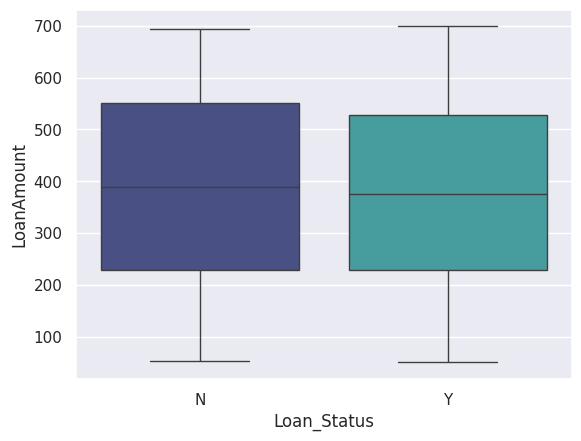

In [50]:
sns.boxplot(x='Loan_Status',y='LoanAmount',data=df, palette='mako')

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

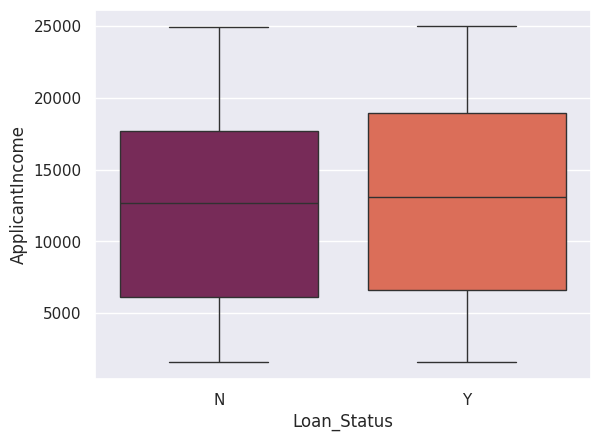

In [51]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=df, palette='rocket')

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

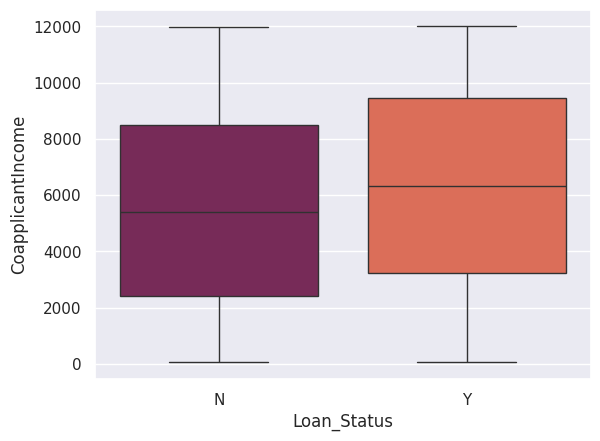

In [52]:
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=df, palette='rocket')

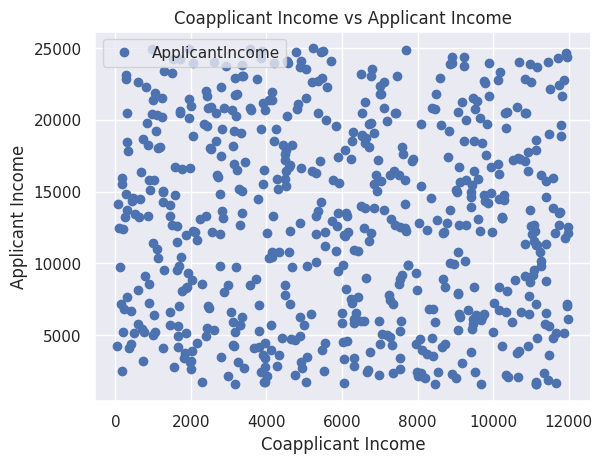

In [53]:
df.plot(x="CoapplicantIncome",y="ApplicantIncome",style='o')
plt.title('Coapplicant Income vs Applicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Applicant Income')
plt.show()

In [54]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: >

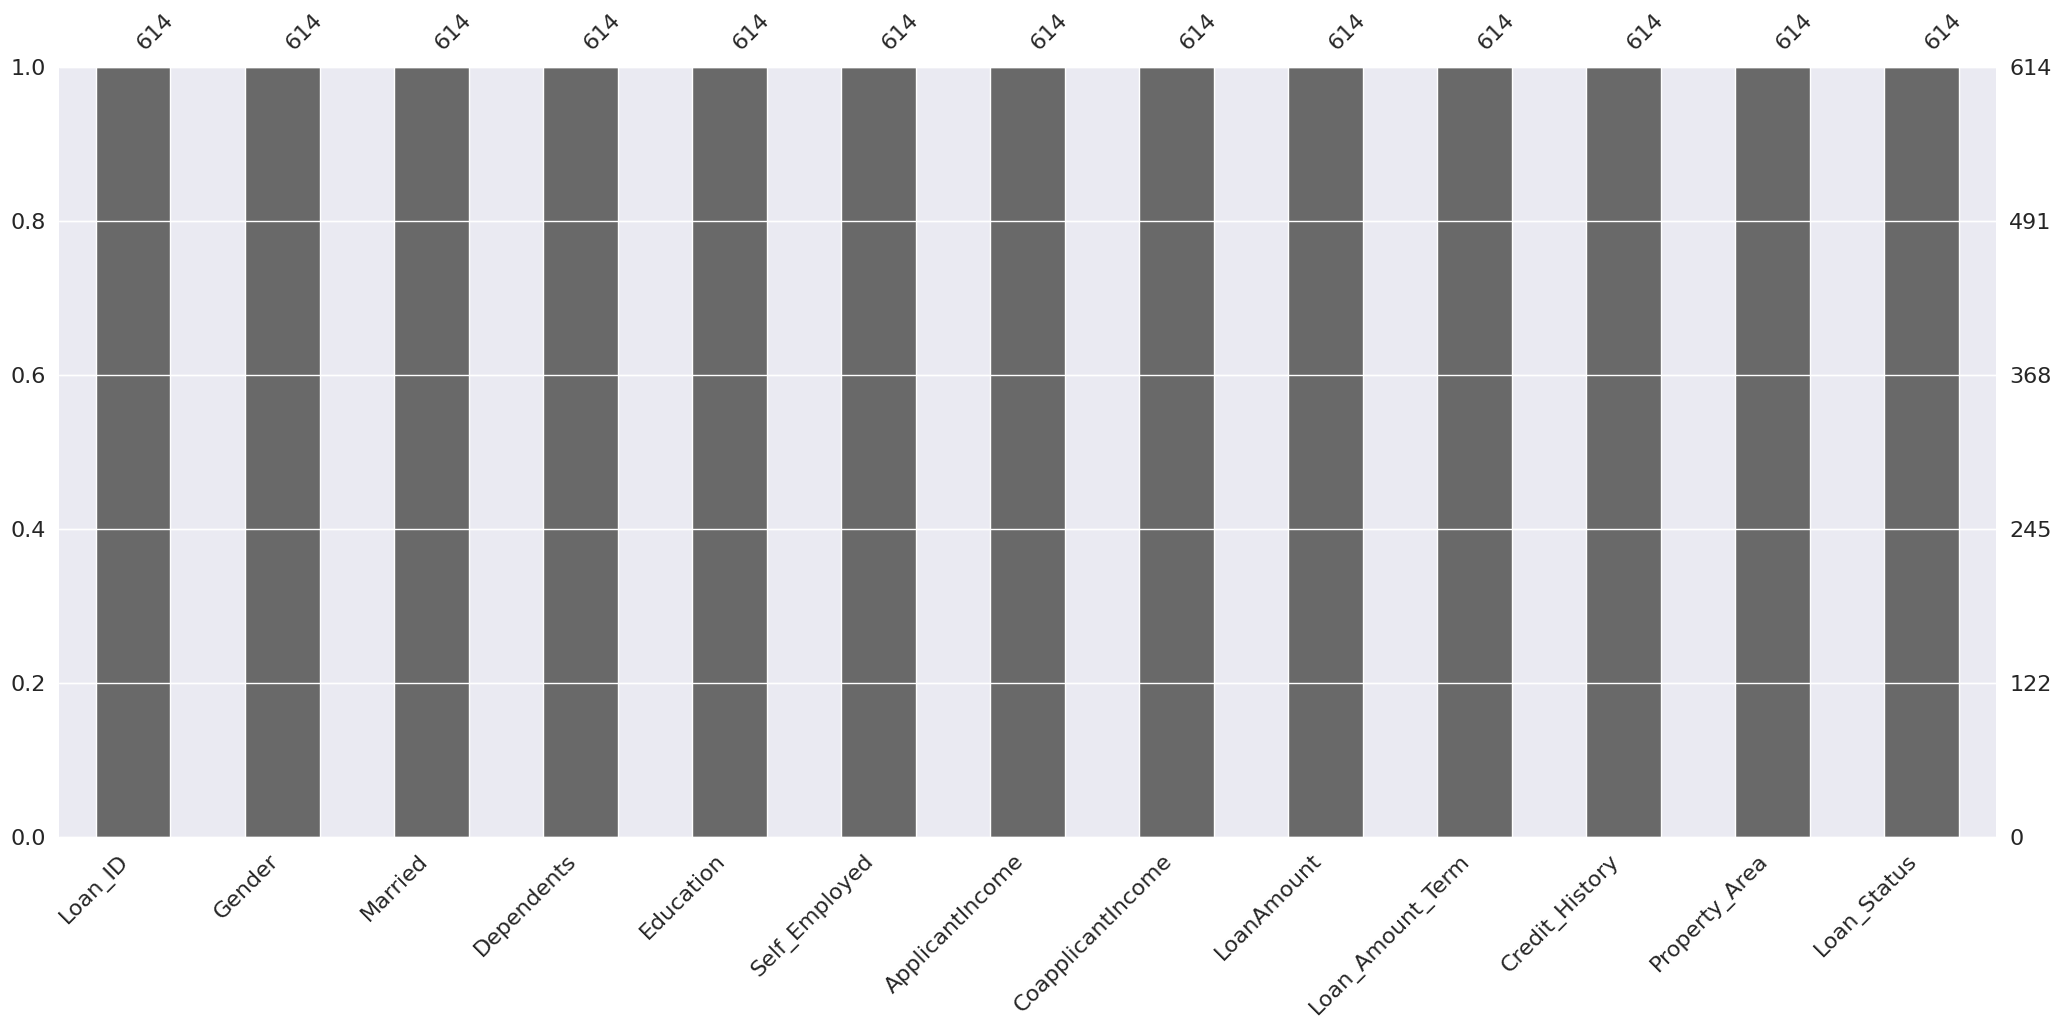

In [55]:
import missingno as msno
msno.bar(df)

In [56]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP000001,Male,No,3+,Graduate,No,14268,1257,465,360,1.0,Urban,N
1,LP000002,Female,No,0,Graduate,No,14532,464,553,360,1.0,Rural,N
2,LP000003,Male,Yes,2,Not Graduate,No,5695,3294,503,360,1.0,Semiurban,Y
3,LP000004,Male,Yes,0,Graduate,No,23062,6774,340,300,1.0,Urban,Y
4,LP000005,Male,No,0,Graduate,No,20439,7431,583,360,0.0,Urban,N


In [57]:
df = df.drop(['Loan_ID'],axis=1)

In [58]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,3+,Graduate,No,14268,1257,465,360,1.0,Urban,N
1,Female,No,0,Graduate,No,14532,464,553,360,1.0,Rural,N
2,Male,Yes,2,Not Graduate,No,5695,3294,503,360,1.0,Semiurban,Y
3,Male,Yes,0,Graduate,No,23062,6774,340,300,1.0,Urban,Y
4,Male,No,0,Graduate,No,20439,7431,583,360,0.0,Urban,N


In [59]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [60]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [61]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [62]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [63]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [64]:
df['LoanAmount'].mean(), df['LoanAmount'].mode()[0], df['LoanAmount'].median()

(np.float64(377.7247557003257), np.int64(656), 379.0)

In [65]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [66]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


<Axes: >

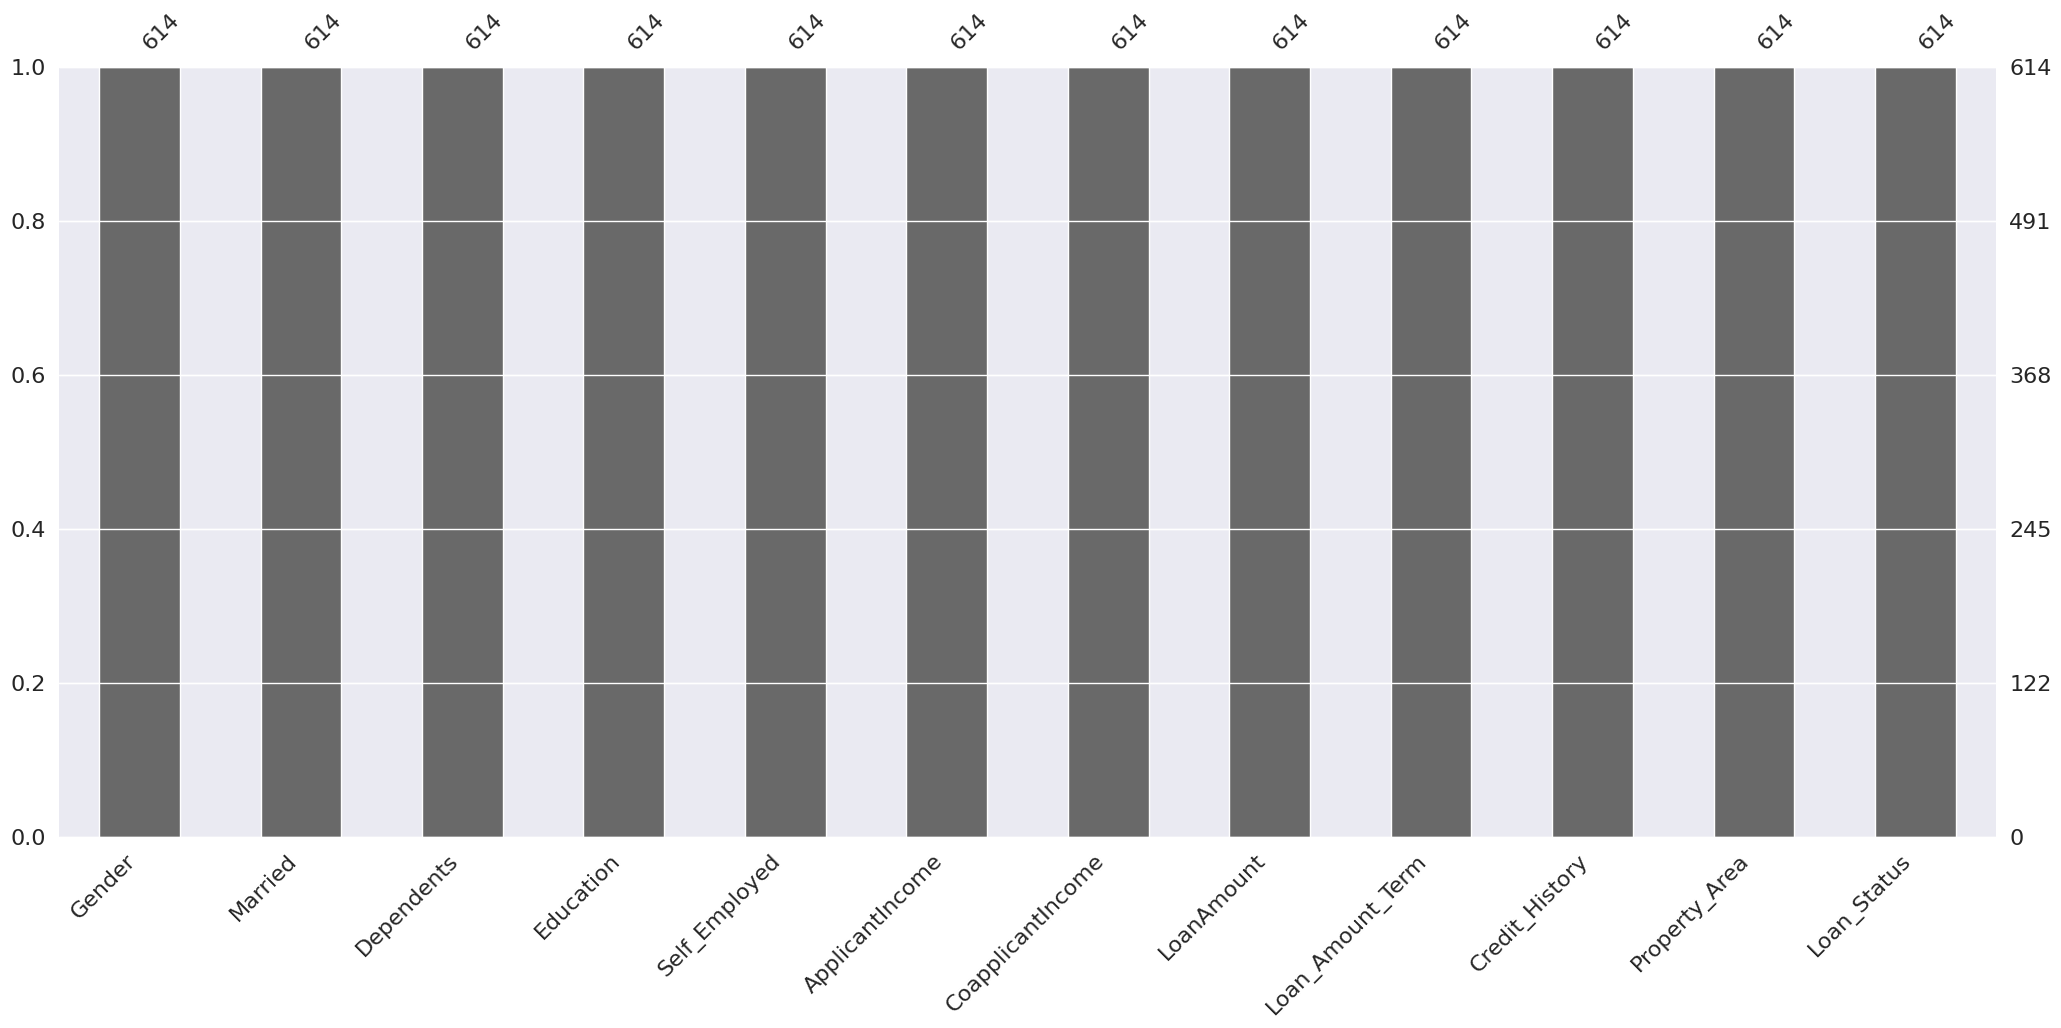

In [67]:
msno.bar(df)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    int64  
 7   LoanAmount         614 non-null    int64  
 8   Loan_Amount_Term   614 non-null    int64  
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 57.7+ KB


In [69]:
df = pd.get_dummies(df)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    int64  
 2   LoanAmount               614 non-null    int64  
 3   Loan_Amount_Term         614 non-null    int64  
 4   Credit_History           614 non-null    float64
 5   Gender_Female            614 non-null    bool   
 6   Gender_Male              614 non-null    bool   
 7   Married_No               614 non-null    bool   
 8   Married_Yes              614 non-null    bool   
 9   Dependents_0             614 non-null    bool   
 10  Dependents_1             614 non-null    bool   
 11  Dependents_2             614 non-null    bool   
 12  Dependents_3+            614 non-null    bool   
 13  Education_Graduate       614 non-null    bool   
 14  Education_Not Graduate   6

In [71]:
df = df.drop(columns=['Gender_Female','Married_No','Education_Not Graduate','Self_Employed_No','Loan_Status_N'], axis=1)

In [72]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,14268,1257,465,360,1.0,True,False,False,False,False,True,True,False,False,False,True,False
1,14532,464,553,360,1.0,False,False,True,False,False,False,True,False,True,False,False,False
2,5695,3294,503,360,1.0,True,True,False,False,True,False,False,False,False,True,False,True
3,23062,6774,340,300,1.0,True,True,True,False,False,False,True,False,False,False,True,True
4,20439,7431,583,360,0.0,True,False,True,False,False,False,True,False,False,False,True,False


In [73]:
newColName = {'Married_Yes':'Married',
              'Self_Employed_Yes':'Self_Employed',
              'Loan_Status_Y':'Loan_Status'}

df.rename(columns=newColName,inplace=True)

In [74]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,14268,1257,465,360,1.0,True,False,False,False,False,True,True,False,False,False,True,False
1,14532,464,553,360,1.0,False,False,True,False,False,False,True,False,True,False,False,False
2,5695,3294,503,360,1.0,True,True,False,False,True,False,False,False,False,True,False,True
3,23062,6774,340,300,1.0,True,True,True,False,False,False,True,False,False,False,True,True
4,20439,7431,583,360,0.0,True,False,True,False,False,False,True,False,False,False,True,False


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    int64  
 2   LoanAmount               614 non-null    int64  
 3   Loan_Amount_Term         614 non-null    int64  
 4   Credit_History           614 non-null    float64
 5   Gender_Male              614 non-null    bool   
 6   Married                  614 non-null    bool   
 7   Dependents_0             614 non-null    bool   
 8   Dependents_1             614 non-null    bool   
 9   Dependents_2             614 non-null    bool   
 10  Dependents_3+            614 non-null    bool   
 11  Education_Graduate       614 non-null    bool   
 12  Self_Employed            614 non-null    bool   
 13  Property_Area_Rural      614 non-null    bool   
 14  Property_Area_Semiurban  6

In [76]:
for col in df.columns:
  if (df[col].dtype == 'bool'):
    df[col] = df[col].astype('int64')

In [77]:
df.dtypes

,0
ApplicantIncome,int64
CoapplicantIncome,int64
LoanAmount,int64
Loan_Amount_Term,int64
Credit_History,float64
Gender_Male,int64
Married,int64
Dependents_0,int64
Dependents_1,int64
Dependents_2,int64


<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

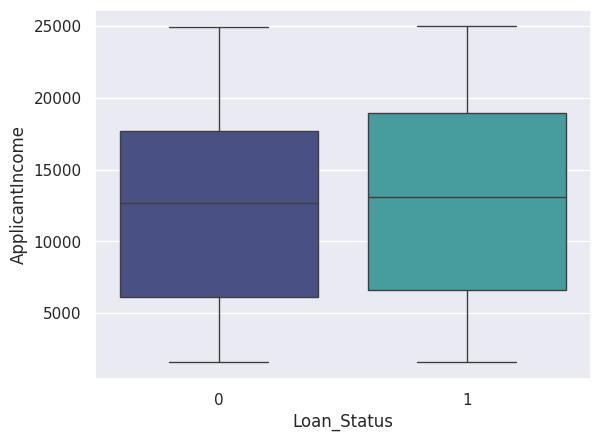

In [78]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=df, palette='mako')

<Axes: xlabel='CoapplicantIncome', ylabel='Loan_Status'>

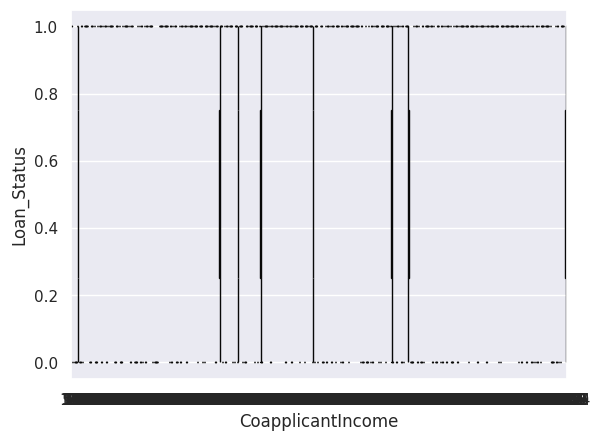

In [79]:
sns.boxplot(x='CoapplicantIncome',y='Loan_Status',data=df, palette='rocket')

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

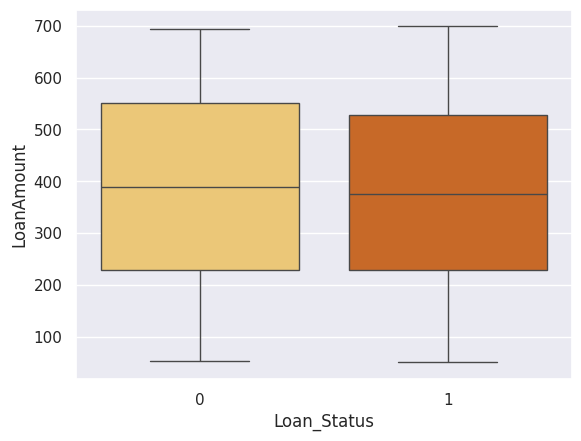

In [80]:
sns.boxplot(x = "Loan_Status", y = "LoanAmount", data = df, palette = "YlOrBr")

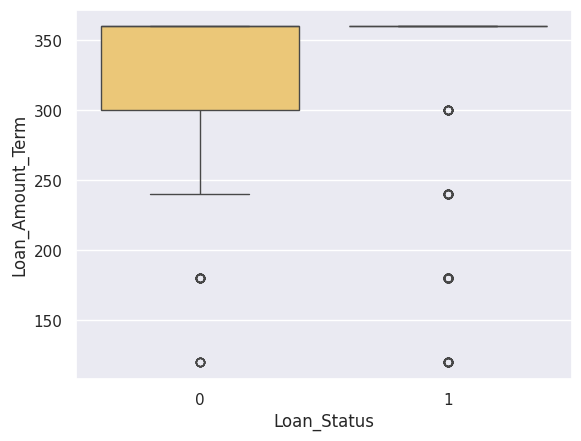

In [81]:
sns.boxplot(x="Loan_Status", y="Loan_Amount_Term", data=df, palette="YlOrBr");

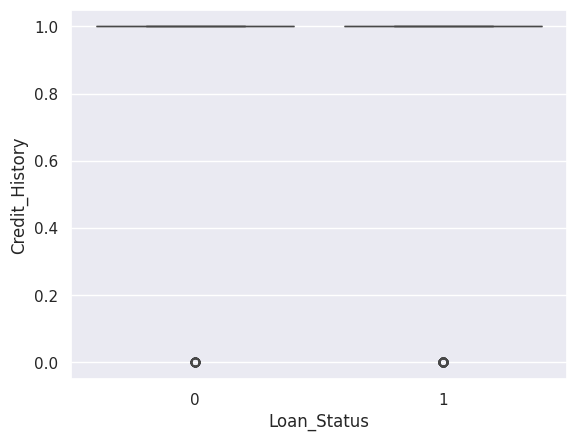

In [82]:
sns.boxplot(x="Loan_Status", y="Credit_History", data=df, palette="YlOrBr");

In [83]:
Q1 = df.quantile(0.25)
Q1

,0.25
ApplicantIncome,6494.50
CoapplicantIncome,3072.75
LoanAmount,228.25
Loan_Amount_Term,300.00
Credit_History,1.00
Gender_Male,1.00
Married,0.00
Dependents_0,0.00
Dependents_1,0.00
Dependents_2,0.00


In [84]:
Q3 = df.quantile(0.75)
Q3

,0.75
ApplicantIncome,18655.25
CoapplicantIncome,9115.50
LoanAmount,539.00
Loan_Amount_Term,360.00
Credit_History,1.00
Gender_Male,1.00
Married,1.00
Dependents_0,1.00
Dependents_1,0.00
Dependents_2,0.00


In [85]:
IQR = Q3 - Q1
IQR

,0
ApplicantIncome,12160.75
CoapplicantIncome,6042.75
LoanAmount,310.75
Loan_Amount_Term,60.00
Credit_History,0.00
Gender_Male,0.00
Married,1.00
Dependents_0,1.00
Dependents_1,0.00
Dependents_2,0.00


In [86]:
(df < (Q1 - 1.5 * IQR)).sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,90
Credit_History,120
Gender_Male,132
Married,0
Dependents_0,0
Dependents_1,0
Dependents_2,0


In [87]:
(df < (Q3 - 1.5 * IQR)).sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,19
Loan_Amount_Term,125
Credit_History,120
Gender_Male,132
Married,0
Dependents_0,0
Dependents_1,0
Dependents_2,0


In [88]:
df = df[~((df < (Q1 - 1.5 * IQR ))|(df > (Q3 + 1.5 * IQR))).any(axis=1)]

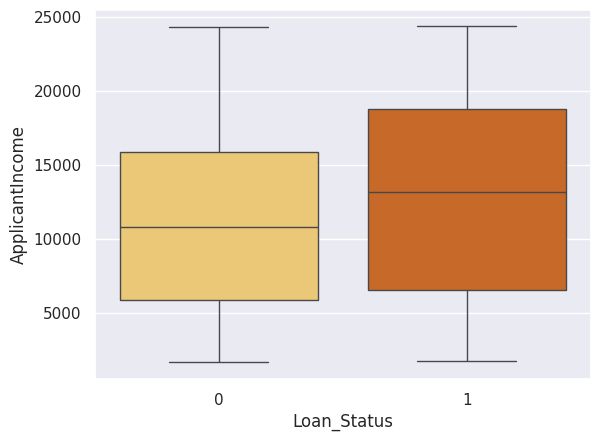

In [89]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="YlOrBr");

<Axes: xlabel='LoanAmount', ylabel='Count'>

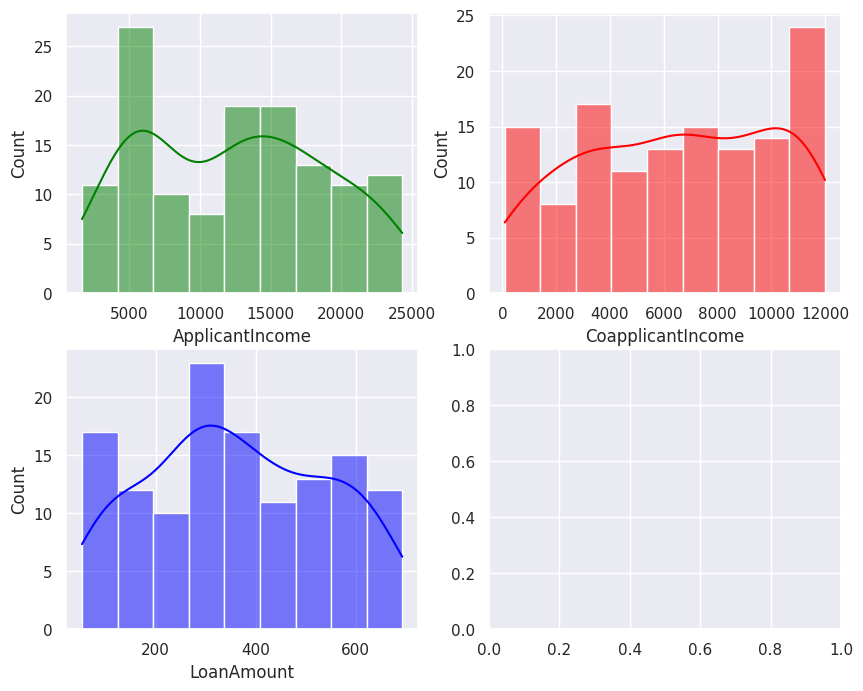

In [90]:
sns.set(style="darkgrid")
fig,axs = plt.subplots(2,2, figsize=(10, 8))

sns.histplot(df['ApplicantIncome'], ax=axs[0,0],kde=True,color='green')
sns.histplot(df['CoapplicantIncome'], ax=axs[0,1],kde=True,color='red')
sns.histplot(df['LoanAmount'], ax=axs[1,0],kde=True,color='blue')

In [91]:
df.ApplicantIncome = np.log(df.ApplicantIncome)
df.LoanAmount = np.log(df.LoanAmount)
df.CoapplicantIncome = np.log(df.CoapplicantIncome)

<Axes: xlabel='LoanAmount', ylabel='Count'>

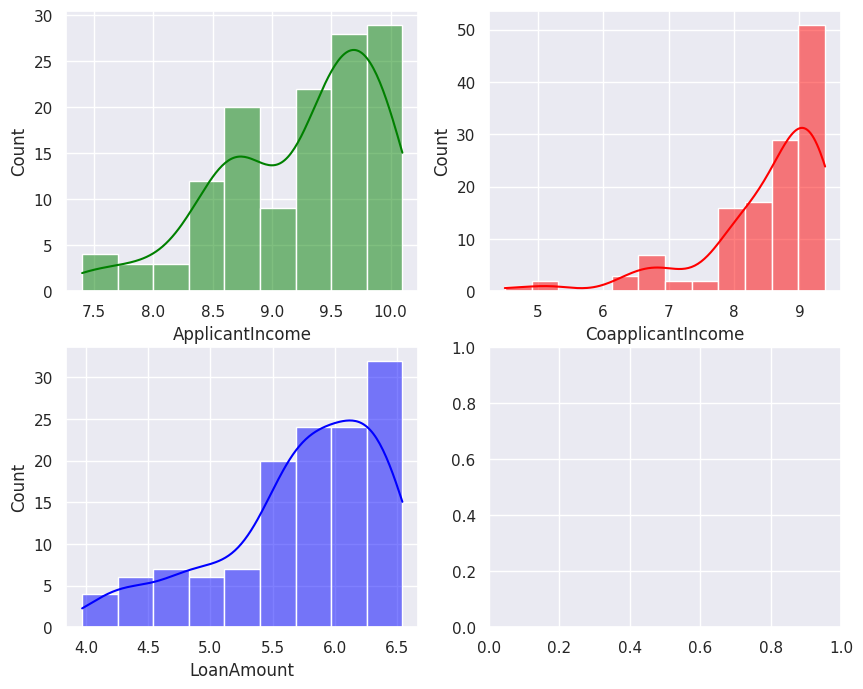

In [92]:
sns.set(style="darkgrid")
fig,axs = plt.subplots(2,2, figsize=(10, 8))

sns.histplot(df['ApplicantIncome'], ax=axs[0,0],kde=True,color='green')
sns.histplot(df['CoapplicantIncome'], ax=axs[0,1],kde=True,color='red')
sns.histplot(df['LoanAmount'], ax=axs[1,0],kde=True,color='blue')

In [93]:
X = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

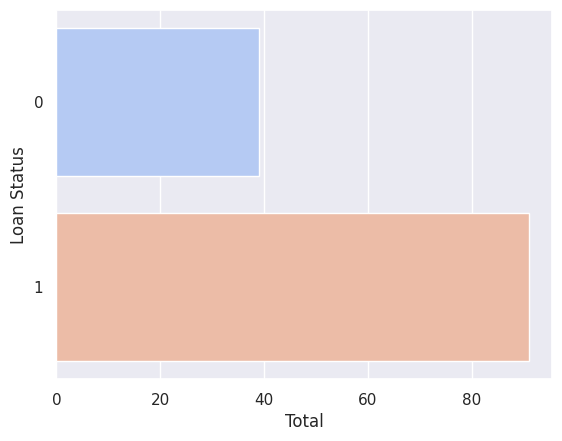

In [94]:
sns.set_theme(style="darkgrid")
sns.countplot(y = y,data = df,palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [95]:
from imblearn.over_sampling import SMOTE
X,y = SMOTE().fit_resample(X,y)

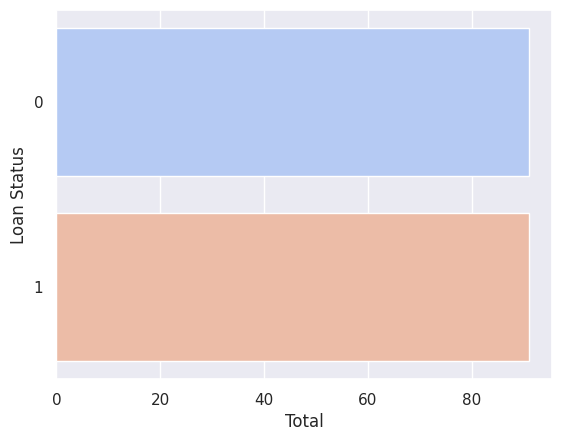

In [96]:
sns.set_theme(style="darkgrid")
sns.countplot(y = y,data = df,palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [97]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,10.045942,8.820847,5.828946,300,1.0,1,1,1,0,0,0,1,0,0,0,1
1,8.105609,8.710290,4.882802,360,1.0,1,1,1,0,0,0,1,0,0,1,0
2,9.920590,6.997596,5.159055,360,1.0,1,1,1,0,0,0,1,0,0,1,0
3,9.603598,7.928406,5.799093,360,1.0,1,1,1,0,0,0,1,0,0,0,1
4,9.139596,8.983691,6.298949,360,1.0,1,1,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,9.691787,8.393028,5.835537,360,1.0,1,1,1,0,0,0,1,0,0,0,1
178,8.327504,8.193043,5.564849,360,1.0,1,0,1,0,0,0,1,0,1,0,0
179,8.126455,8.662199,4.951029,360,1.0,1,1,1,0,0,0,1,0,0,0,0
180,9.822032,8.906618,4.267552,360,1.0,1,0,1,0,0,0,1,0,1,0,0


In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Instantiate scaler
X = scaler.fit_transform(X) # Fit and transform X

In [99]:
X

array([[0.98000823, 0.88329817, 0.72300392, ..., 0.        , 0.        ,
        1.        ],
       [0.2613422 , 0.86069827, 0.35496032, ..., 0.        , 1.        ,
        0.        ],
       [0.93358033, 0.51059268, 0.46242104, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.26906308, 0.85086773, 0.38150003, ..., 0.        , 0.        ,
        0.        ],
       [0.89707581, 0.9008312 , 0.1156321 , ..., 1.        , 0.        ,
        0.        ],
       [0.92975877, 0.80986027, 0.90401962, ..., 0.        , 1.        ,
        0.        ]])

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=45)

In [101]:
print("Shape of X_trian:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_trian: (127, 16)
Shape of X_test: (55, 16)
Shape of y_train: (127,)
Shape of y_test: (55,)


In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
lg = LogisticRegression(solver = 'saga', max_iter=500, random_state=1)
lg.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=1, solver='saga')

In [104]:
x_pred = lg.predict(X_test)

In [105]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,x_pred))
print(confusion_matrix(y_test,x_pred))

              precision    recall  f1-score   support

           0       0.72      0.43      0.54        30
           1       0.54      0.80      0.65        25

    accuracy                           0.60        55
   macro avg       0.63      0.62      0.59        55
weighted avg       0.64      0.60      0.59        55

[[13 17]
 [ 5 20]]


In [106]:
lrAcc = accuracy_score(y_test,x_pred)

print("Logestic Regression Accuarcy : {:.2f}%".format(lrAcc*100))

Logestic Regression Accuarcy : 60.00%


In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [108]:
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.5636363636363636

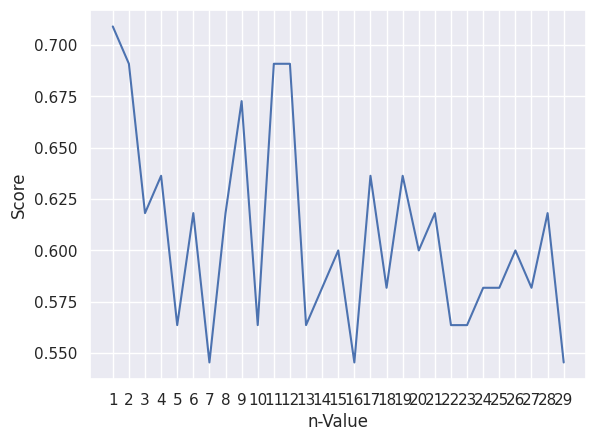

In [109]:
knnScore = []
for i in range(1,30):
  knnClassifier = KNeighborsClassifier(n_neighbors=i)
  knnClassifier.fit(X_train,y_train)
  knnScore.append(knnClassifier.score(X_test,y_test))

plt.plot(range(1,30),knnScore)
plt.xticks(np.arange(1,30,1))
plt.xlabel("n-Value")
plt.ylabel("Score")
plt.show()

In [110]:
knnAcc = max(knnScore)

print("KNN Accuarcy : {:.2f}%".format(knnAcc*100))

KNN Accuarcy : 70.91%


In [111]:
from sklearn.svm import SVC

In [112]:
sv = SVC(kernel='linear',random_state=1)
sv.fit(X_train,y_train)

SVC(kernel='linear', random_state=1)

In [113]:
y_pred = sv.predict(X_test)

print("Classification Report",classification_report(y_test,y_pred))
print("Confusion Matrix",confusion_matrix(y_test,y_pred))

svAcc = accuracy_score(y_test,y_pred)
print("SVC Accuary:{:.2f}%".format(svAcc*100))

Classification Report               precision    recall  f1-score   support

           0       0.73      0.27      0.39        30
           1       0.50      0.88      0.64        25

    accuracy                           0.55        55
   macro avg       0.61      0.57      0.51        55
weighted avg       0.62      0.55      0.50        55

Confusion Matrix [[ 8 22]
 [ 3 22]]
SVC Accuary:54.55%


In [114]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

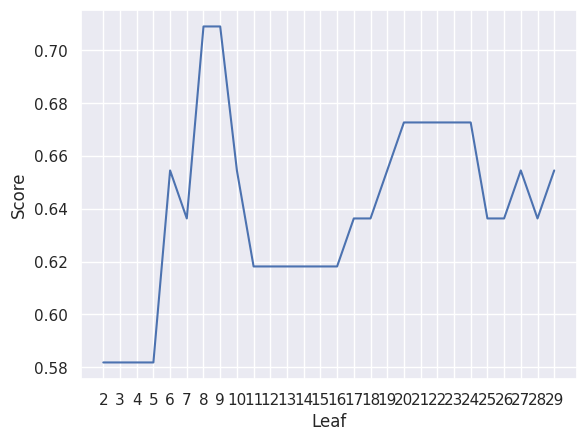

In [115]:
scoreDTree = []
for i in range(2, 30):
  dtree = DecisionTreeClassifier(max_leaf_nodes = i).fit(X_train,y_train)
  scoreDTree.append(dtree.score(X_test, y_test))


plt.plot(range(2,30), scoreDTree)
plt.xticks(np.arange(2,30,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()

In [116]:
dtAcc = max(scoreDTree)
print("Decision Tree Accuracy : {:.2f}%".format(dtAcc*100))

Decision Tree Accuracy : 70.91%


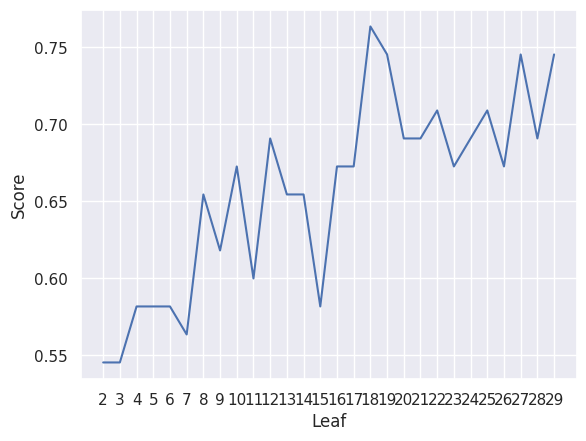

In [117]:
from sklearn.ensemble import RandomForestClassifier

scoreRfTree = []
for i in range(2, 30):
  rf = RandomForestClassifier(n_estimators=100, max_leaf_nodes = i).fit(X_train,y_train)
  scoreRfTree.append(rf.score(X_test, y_test))


plt.plot(range(2,30), scoreRfTree)
plt.xticks(np.arange(2,30,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()

In [118]:
rfAcc = max(scoreRfTree)
print("Random Forest Accuracy: {:.2f}%".format(rfAcc*100))

Random Forest Accuracy: 76.36%


In [119]:
from sklearn.ensemble import GradientBoostingClassifier

In [120]:
gb = GradientBoostingClassifier(subsample = 0.5,
                           n_estimators=500,
                           max_depth=4,
                           max_leaf_nodes = 12)
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, max_leaf_nodes=12, n_estimators=500,
                           subsample=0.5)

In [121]:
y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        30
           1       0.72      0.72      0.72        25

    accuracy                           0.75        55
   macro avg       0.74      0.74      0.74        55
weighted avg       0.75      0.75      0.75        55

[[23  7]
 [ 7 18]]


In [122]:
gbAcc = accuracy_score(y_pred, y_test)
print("Gradient Boosting Accuracy: {:.2f}%".format(gbAcc*100))

Gradient Boosting Accuracy: 74.55%


In [123]:
lrAcc, knnAcc, svAcc, dtAcc, rfAcc, gbAcc

(0.6,
 0.7090909090909091,
 0.5454545454545454,
 0.7090909090909091,
 0.7636363636363637,
 0.7454545454545455)

In [124]:
pd.DataFrame({"Model":['Logisitic regression',
                       'K Neighbors Classifier',
                       'SVM Classifier',
                       'Decision Tree Classifier',
                       'RandomForest  Classifier',
                       'Gradient Boosting Classifier'],
              "Accuracy":[lrAcc*100,
                          knnAcc*100,
                          svAcc*100,
                          dtAcc*100,
                          rfAcc*100,
                          gbAcc*100]}).sort_values(by="Accuracy", ascending=False)


,Model,Accuracy
4,RandomForest Classifier,76.363636
5,Gradient Boosting Classifier,74.545455
3,Decision Tree Classifier,70.909091
1,K Neighbors Classifier,70.909091
0,Logisitic regression,60.000000
2,SVM Classifier,54.545455


In [125]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
3,10.045942,8.820847,5.828946,300,1.0,1,1,1,0,0,0,1,0,0,0,1,1
18,8.105609,8.710290,4.882802,360,1.0,1,1,1,0,0,0,1,0,0,1,0,0
19,9.920590,6.997596,5.159055,360,1.0,1,1,1,0,0,0,1,0,0,1,0,1
25,9.603598,7.928406,5.799093,360,1.0,1,1,1,0,0,0,1,0,0,0,1,1
29,9.139596,8.983691,6.298949,360,1.0,1,1,1,0,0,0,1,0,1,0,0,1


In [126]:
# Create a sample data point (replace with your desired values)
# The order of columns must match the training data after preprocessing
sample_data = [[14268, 1257, 465, 360, 1.0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]] # Example: ApplicantIncome=14268, CoapplicantIncome=1257, LoanAmount=465, Loan_Amount_Term=360, Credit_History=1.0, Gender_Male=1, Married=0, Dependents_0=0, Dependents_1=0, Dependents_2=0, Dependents_3+=1, Education_Graduate=1, Self_Employed=0, Property_Area_Rural=0, Property_Area_Semiurban=0, Property_Area_Urban=1

# Define columns in the order expected by the model
sample_columns = [
    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
    'Gender_Male', 'Married', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
    'Education_Graduate', 'Self_Employed', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban'
]

# Convert to DataFrame for easier preprocessing
sample_df = pd.DataFrame(sample_data, columns=sample_columns)

# Apply the same transformations as the training data
# Log transformation for skewed numerical features (as done in cell egL8uhodXO73)
sample_df['ApplicantIncome'] = np.log(sample_df['ApplicantIncome'])
sample_df['CoapplicantIncome'] = np.log(sample_df['CoapplicantIncome'])
sample_df['LoanAmount'] = np.log(sample_df['LoanAmount'])

# MinMax Scaling (using the scaler fitted on the training data)
# 'scaler' object should be available from cell VQYeU7VSZNKs after modification
sample_scaled = scaler.transform(sample_df) # Use the fitted scaler, not fit_transform here

# Predict using the trained KNN model
predicted_status = knn.predict(sample_scaled)

# Map the prediction back to 'Y' or 'N'
loan_status = 'Y' if predicted_status[0] == 1 else 'N'

print(f"Predicted Loan Status: {loan_status}")

Predicted Loan Status: N
